In [9]:
import yt

yt : [INFO     ] 2022-04-29 15:09:26,701 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-29 15:09:26,704 Parameters: domain_dimensions         = [50  1  1]
yt : [INFO     ] 2022-04-29 15:09:26,706 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-04-29 15:09:26,708 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-04-29 15:09:26,710 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-29 15:09:26,876 Parameters: current_time              = 2.0
yt : [INFO     ] 2022-04-29 15:09:26,877 Parameters: domain_dimensions         = [50  1  1]
yt : [INFO     ] 2022-04-29 15:09:26,879 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-04-29 15:09:26,881 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-04-29 15:09:26,883 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-29 15:09:26,994 Parameters: current_time              = 2.0
yt : [INFO     ] 2022

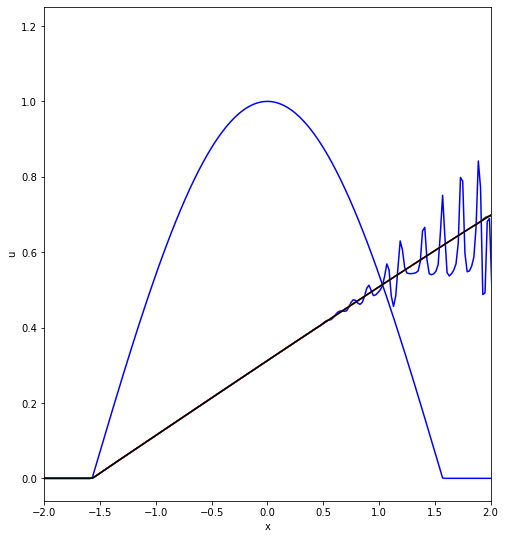

In [14]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

n = "0100"
ds1 = yt.load("nonlin_adv_diff_minmod_0000.dat", unit_system="code")
ds2 = yt.load("nonlin_adv_diff_minmod_" + n + ".dat", unit_system="code")
ds3 = yt.load("nonlin_adv_diff_woodward_" + n + ".dat", unit_system="code")
ds4 = yt.load("nonlin_adv_diff_cada3_" + n + ".dat", unit_system="code")
ds5 = yt.load("nonlin_adv_diff_weno7_" + n + ".dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
_, c3 = ds3.find_max("u")
_, c4 = ds4.find_max("u")
_, c5 = ds5.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))
ray3 = ds3.ortho_ray(ax, (c3[1], c3[2]))
ray4 = ds4.ortho_ray(ax, (c4[1], c4[2]))
ray5 = ds5.ortho_ray(ax, (c5[1], c5[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])
srt3 = np.argsort(ray3["index", "x"])
srt4 = np.argsort(ray4["index", "x"])
srt5 = np.argsort(ray5["index", "x"])

plt.figure(figsize=(8,20))
plt.subplot(211)
plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), 'b')
plt.plot(np.array(ray5["index", "x"][srt5]), np.array(ray5["u"][srt5]), 'b', label='Weno7')
plt.plot(np.array(ray4["index", "x"][srt4]), np.array(ray4["u"][srt4]), 'g', label='Cada3')
plt.plot(np.array(ray3["index", "x"][srt3]), np.array(ray3["u"][srt3]), 'r', label='Woodward')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), 'k', label='Minmod')
plt.xlim(-2, 2)
plt.xlabel("x")
plt.ylabel("u")
#plt.legend(loc='upper left')

plt.savefig("begin.png")
#plt.savefig("limiters.png")

yt : [INFO     ] 2022-05-24 10:22:57,106 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-24 10:22:57,108 Parameters: domain_dimensions         = [120   1   1]
yt : [INFO     ] 2022-05-24 10:22:57,110 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-05-24 10:22:57,112 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-05-24 10:22:57,113 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-05-24 10:22:57,138 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2022-05-24 10:22:57,735 max value is 1.00000e+00 at -0.7958333333333335 0.5000000000000000 0.5000000000000000


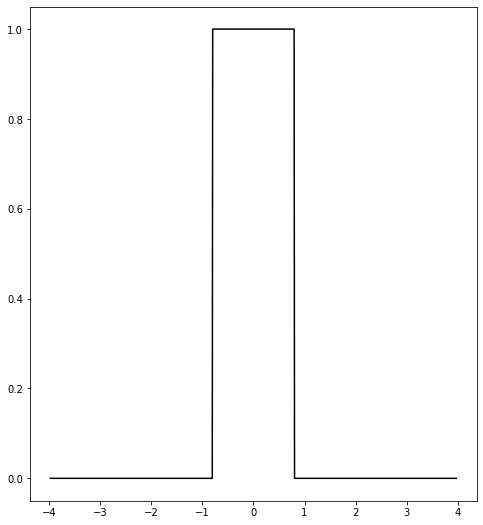

In [1]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

ds = yt.load("pure_adv_nolimit0001.dat", unit_system="code")
_, c = ds.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray = ds.ortho_ray(ax, (c[1], c[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt = np.argsort(ray["index", "x"])

plt.figure(figsize=(8,20))
plt.subplot(211)
plt.plot(np.array(ray["index", "x"][srt]), np.array(ray["u"][srt]), 'k')
#plt.xlim(-2, 2)
#plt.xlabel("x")
#plt.ylabel("u")
#plt.legend(loc='upper left')

In [10]:
#ds.covering_grid() #Data in matrix uit dat file halen
for n in range(0,1,1):
    name = "nonlin_adv_diff_00" + str(n) + "0.dat"
    ds = yt.load(name, unit_system="code")
    p = yt.LinePlot(ds, "u", (0.0, 0.0, 0.0), (10.0, 1.0, 1.0), 120)
    p.set_log("u", False)
    p.show()

FileNotFoundError: No such file or directory: 'nonlin_adv_diff_0000.dat'.
(Also tried 'c:\Users\gebruiker\codes\amrvac\tests\ard\no_reac_1d\output\nonlin_adv_diff_0000.dat').

yt : [INFO     ] 2022-04-30 13:16:30,611 Parameters: current_time              = 2.0
yt : [INFO     ] 2022-04-30 13:16:30,612 Parameters: domain_dimensions         = [50  1  1]
yt : [INFO     ] 2022-04-30 13:16:30,614 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-04-30 13:16:30,616 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-04-30 13:16:30,617 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-30 13:16:30,734 Parameters: current_time              = 2.0
yt : [INFO     ] 2022-04-30 13:16:30,735 Parameters: domain_dimensions         = [40  1  1]
yt : [INFO     ] 2022-04-30 13:16:30,739 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-04-30 13:16:30,742 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-04-30 13:16:30,744 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-04-30 13:16:30,790 e not found and no parfile passed, can not set thermal_pressure.


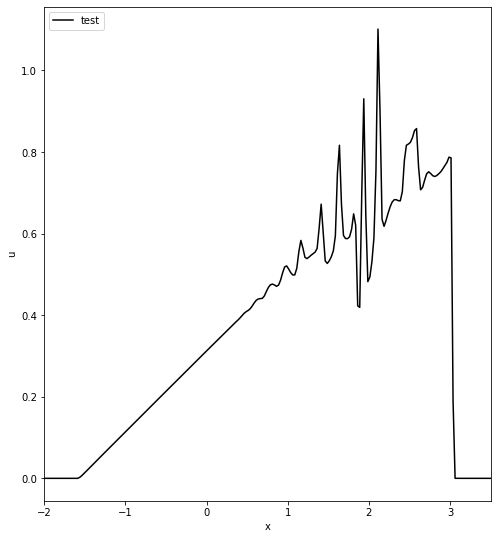

In [37]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

n = "0100"
ds1 = yt.load("nonlin_adv_diff_weno7_" + n + ".dat", unit_system="code")
ds2 = yt.load("nonlin_adv_diff_test_" + n + ".dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])

plt.figure(figsize=(8,20))
plt.subplot(211)
#plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), 'b', label='weno7')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), 'k', label='test')
plt.xlim(-2, 3.5)
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='upper left')

#plt.savefig("begin.png")
#plt.savefig("limiters.png")

yt : [INFO     ] 2022-05-01 14:09:49,794 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-01 14:09:49,796 Parameters: domain_dimensions         = [120   1   1]
yt : [INFO     ] 2022-05-01 14:09:49,798 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-05-01 14:09:49,800 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-05-01 14:09:49,803 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2022-05-01 14:09:49,875 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2022-05-01 14:09:51,128 max value is 1.99479e+00 at -0.7958333333333335 0.5000000000000000 0.5000000000000000
yt : [INFO     ] 2022-05-01 14:09:51,231 Parameters: current_time              = 0.2
yt : [INFO     ] 2022-05-01 14:09:51,232 Parameters: domain_dimensions         = [120   1   1]
yt : [INFO     ] 2022-05-01 14:09:51,232 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-05-01 14:09:51,234 P

Text(0, 0.5, 'u')

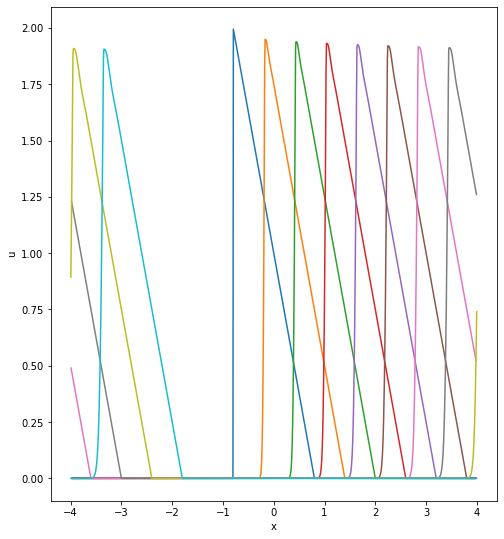

In [120]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

plt.figure(figsize=(8,20))
plt.subplot(211)

for n in range(0,10):
    ds = yt.load("pure_adv_00" + str(n) + "0.dat", unit_system="code")
    _, c = ds.find_max("u")
    ax = 0  # take a line cut along the x axis

    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))

    # Sort the ray values by 'x' so there are no discontinuities
    # in the line plot
    srt = np.argsort(ray["index", "x"])

    plt.plot(np.array(ray["index", "x"][srt]), np.array(ray["u"][srt]))

#plt.xlim(-2, 3.5)
plt.xlabel("x")
plt.ylabel("u")
#plt.legend(loc='upper left')


yt : [INFO     ] 2022-06-05 20:49:28,339 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-05 20:49:28,342 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-05 20:49:28,344 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-06-05 20:49:28,345 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-06-05 20:49:28,347 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-05 20:49:28,466 Parameters: current_time              = 0.2
yt : [INFO     ] 2022-06-05 20:49:28,470 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-05 20:49:28,472 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-06-05 20:49:28,473 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-06-05 20:49:28,475 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-05 20:49:28,564 Parameters: current_time              = 0.4
yt : [INF

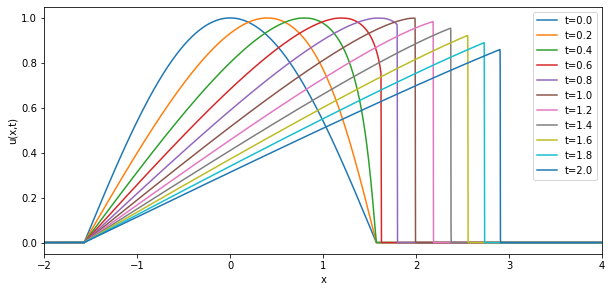

In [17]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

n = "0100"
ds1 = yt.load("nonlin_adv_0000.dat", unit_system="code")
ds2 = yt.load("nonlin_adv_0010.dat", unit_system="code")
ds3 = yt.load("nonlin_adv_0020.dat", unit_system="code")
ds4 = yt.load("nonlin_adv_0030.dat", unit_system="code")
ds5 = yt.load("nonlin_adv_0040.dat", unit_system="code")
ds6 = yt.load("nonlin_adv_0050.dat", unit_system="code")
ds7 = yt.load("nonlin_adv_0060.dat", unit_system="code")
ds8 = yt.load("nonlin_adv_0070.dat", unit_system="code")
ds9 = yt.load("nonlin_adv_0080.dat", unit_system="code")
ds10 = yt.load("nonlin_adv_0090.dat", unit_system="code")
ds11 = yt.load("nonlin_adv_0100.dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
_, c3 = ds3.find_max("u")
_, c4 = ds4.find_max("u")
_, c5 = ds5.find_max("u")
_, c6 = ds6.find_max("u")
_, c7 = ds7.find_max("u")
_, c8 = ds8.find_max("u")
_, c9 = ds9.find_max("u")
_, c10 = ds10.find_max("u")
_, c11 = ds11.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))
ray3 = ds3.ortho_ray(ax, (c3[1], c3[2]))
ray4 = ds4.ortho_ray(ax, (c4[1], c4[2]))
ray5 = ds5.ortho_ray(ax, (c5[1], c5[2]))
ray6 = ds6.ortho_ray(ax, (c6[1], c6[2]))
ray7 = ds7.ortho_ray(ax, (c7[1], c7[2]))
ray8 = ds8.ortho_ray(ax, (c8[1], c8[2]))
ray9 = ds9.ortho_ray(ax, (c9[1], c9[2]))
ray10 = ds10.ortho_ray(ax, (c10[1], c10[2]))
ray11 = ds11.ortho_ray(ax, (c11[1], c11[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])
srt3 = np.argsort(ray3["index", "x"])
srt4 = np.argsort(ray4["index", "x"])
srt5 = np.argsort(ray5["index", "x"])
srt6 = np.argsort(ray6["index", "x"])
srt7 = np.argsort(ray7["index", "x"])
srt8 = np.argsort(ray8["index", "x"])
srt9 = np.argsort(ray9["index", "x"])
srt10 = np.argsort(ray10["index", "x"])
srt11 = np.argsort(ray11["index", "x"])

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), label='t=0.0')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), label='t=0.2')
plt.plot(np.array(ray3["index", "x"][srt3]), np.array(ray3["u"][srt3]), label='t=0.4')
plt.plot(np.array(ray4["index", "x"][srt4]), np.array(ray4["u"][srt4]), label='t=0.6')
plt.plot(np.array(ray5["index", "x"][srt5]), np.array(ray5["u"][srt5]), label='t=0.8')
plt.plot(np.array(ray6["index", "x"][srt6]), np.array(ray6["u"][srt6]), label='t=1.0')
plt.plot(np.array(ray7["index", "x"][srt7]), np.array(ray7["u"][srt7]), label='t=1.2')
plt.plot(np.array(ray8["index", "x"][srt8]), np.array(ray8["u"][srt8]), label='t=1.4')
plt.plot(np.array(ray9["index", "x"][srt9]), np.array(ray9["u"][srt9]), label='t=1.6')
plt.plot(np.array(ray10["index", "x"][srt10]), np.array(ray10["u"][srt10]), label='t=1.8')
plt.plot(np.array(ray11["index", "x"][srt11]), np.array(ray11["u"][srt11]), label='t=2.0')
plt.xlim(-2, 4)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend(loc='upper right')

plt.savefig("inviscid_burgers.png")

yt : [INFO     ] 2022-06-05 20:53:07,638 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-05 20:53:07,640 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-05 20:53:07,644 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-06-05 20:53:07,645 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-06-05 20:53:07,647 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-05 20:53:07,917 Parameters: current_time              = 0.2
yt : [INFO     ] 2022-06-05 20:53:07,919 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-05 20:53:07,921 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-06-05 20:53:07,922 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-06-05 20:53:07,923 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-05 20:53:08,070 Parameters: current_time              = 0.4
yt : [INF

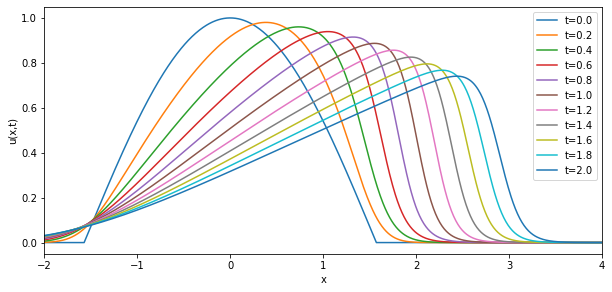

In [21]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

n = "0100"
ds1 = yt.load("nonlin_adv_diff00_0000.dat", unit_system="code")
ds2 = yt.load("nonlin_adv_diff00_0010.dat", unit_system="code")
ds3 = yt.load("nonlin_adv_diff00_0020.dat", unit_system="code")
ds4 = yt.load("nonlin_adv_diff00_0030.dat", unit_system="code")
ds5 = yt.load("nonlin_adv_diff00_0040.dat", unit_system="code")
ds6 = yt.load("nonlin_adv_diff00_0050.dat", unit_system="code")
ds7 = yt.load("nonlin_adv_diff00_0060.dat", unit_system="code")
ds8 = yt.load("nonlin_adv_diff00_0070.dat", unit_system="code")
ds9 = yt.load("nonlin_adv_diff00_0080.dat", unit_system="code")
ds10 = yt.load("nonlin_adv_diff00_0090.dat", unit_system="code")
ds11 = yt.load("nonlin_adv_diff00_0100.dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
_, c3 = ds3.find_max("u")
_, c4 = ds4.find_max("u")
_, c5 = ds5.find_max("u")
_, c6 = ds6.find_max("u")
_, c7 = ds7.find_max("u")
_, c8 = ds8.find_max("u")
_, c9 = ds9.find_max("u")
_, c10 = ds10.find_max("u")
_, c11 = ds11.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))
ray3 = ds3.ortho_ray(ax, (c3[1], c3[2]))
ray4 = ds4.ortho_ray(ax, (c4[1], c4[2]))
ray5 = ds5.ortho_ray(ax, (c5[1], c5[2]))
ray6 = ds6.ortho_ray(ax, (c6[1], c6[2]))
ray7 = ds7.ortho_ray(ax, (c7[1], c7[2]))
ray8 = ds8.ortho_ray(ax, (c8[1], c8[2]))
ray9 = ds9.ortho_ray(ax, (c9[1], c9[2]))
ray10 = ds10.ortho_ray(ax, (c10[1], c10[2]))
ray11 = ds11.ortho_ray(ax, (c11[1], c11[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])
srt3 = np.argsort(ray3["index", "x"])
srt4 = np.argsort(ray4["index", "x"])
srt5 = np.argsort(ray5["index", "x"])
srt6 = np.argsort(ray6["index", "x"])
srt7 = np.argsort(ray7["index", "x"])
srt8 = np.argsort(ray8["index", "x"])
srt9 = np.argsort(ray9["index", "x"])
srt10 = np.argsort(ray10["index", "x"])
srt11 = np.argsort(ray11["index", "x"])

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), label='t=0.0')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), label='t=0.2')
plt.plot(np.array(ray3["index", "x"][srt3]), np.array(ray3["u"][srt3]), label='t=0.4')
plt.plot(np.array(ray4["index", "x"][srt4]), np.array(ray4["u"][srt4]), label='t=0.6')
plt.plot(np.array(ray5["index", "x"][srt5]), np.array(ray5["u"][srt5]), label='t=0.8')
plt.plot(np.array(ray6["index", "x"][srt6]), np.array(ray6["u"][srt6]), label='t=1.0')
plt.plot(np.array(ray7["index", "x"][srt7]), np.array(ray7["u"][srt7]), label='t=1.2')
plt.plot(np.array(ray8["index", "x"][srt8]), np.array(ray8["u"][srt8]), label='t=1.4')
plt.plot(np.array(ray9["index", "x"][srt9]), np.array(ray9["u"][srt9]), label='t=1.6')
plt.plot(np.array(ray10["index", "x"][srt10]), np.array(ray10["u"][srt10]), label='t=1.8')
plt.plot(np.array(ray11["index", "x"][srt11]), np.array(ray11["u"][srt11]), label='t=2.0')
plt.xlim(-2, 4)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend(loc='upper right')

plt.savefig("nonlinear_advection_diffusion.png")

yt : [INFO     ] 2022-06-05 19:56:48,043 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-05 19:56:48,045 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-05 19:56:48,046 Parameters: domain_left_edge          = [-5.  0.  0.]
yt : [INFO     ] 2022-06-05 19:56:48,047 Parameters: domain_right_edge         = [5. 1. 1.]
yt : [INFO     ] 2022-06-05 19:56:48,048 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-05 19:56:48,132 Parameters: current_time              = 0.01
yt : [INFO     ] 2022-06-05 19:56:48,133 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-05 19:56:48,137 Parameters: domain_left_edge          = [-5.  0.  0.]
yt : [INFO     ] 2022-06-05 19:56:48,138 Parameters: domain_right_edge         = [5. 1. 1.]
yt : [INFO     ] 2022-06-05 19:56:48,139 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-05 19:56:48,241 Parameters: current_time              = 0.1
yt : [IN

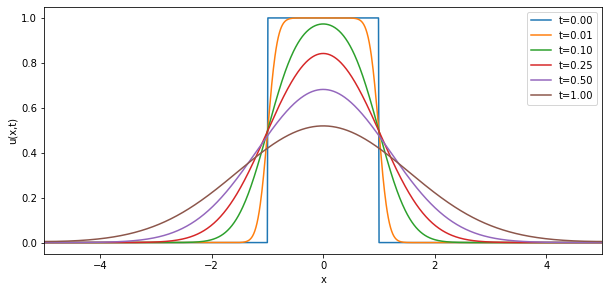

In [11]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

ds1 = yt.load("pure_diff_0000.dat", unit_system="code")
ds2 = yt.load("pure_diff_0001.dat", unit_system="code")
ds3 = yt.load("pure_diff_0010.dat", unit_system="code")
ds4 = yt.load("pure_diff_0025.dat", unit_system="code")
ds5 = yt.load("pure_diff_0050.dat", unit_system="code")
ds6 = yt.load("pure_diff_0100.dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
_, c3 = ds3.find_max("u")
_, c4 = ds4.find_max("u")
_, c5 = ds5.find_max("u")
_, c6 = ds6.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))
ray3 = ds3.ortho_ray(ax, (c3[1], c3[2]))
ray4 = ds4.ortho_ray(ax, (c4[1], c4[2]))
ray5 = ds5.ortho_ray(ax, (c5[1], c5[2]))
ray6 = ds6.ortho_ray(ax, (c6[1], c6[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])
srt3 = np.argsort(ray3["index", "x"])
srt4 = np.argsort(ray4["index", "x"])
srt5 = np.argsort(ray5["index", "x"])
srt6 = np.argsort(ray6["index", "x"])

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), label='t=0.00')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), label='t=0.01')
plt.plot(np.array(ray3["index", "x"][srt3]), np.array(ray3["u"][srt3]), label='t=0.10')
plt.plot(np.array(ray4["index", "x"][srt4]), np.array(ray4["u"][srt4]), label='t=0.25')
plt.plot(np.array(ray5["index", "x"][srt5]), np.array(ray5["u"][srt5]), label='t=0.50')
plt.plot(np.array(ray6["index", "x"][srt6]), np.array(ray6["u"][srt6]), label='t=1.00')
plt.xlim(-5, 5)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend(loc='upper right')

plt.savefig("pure_diffusion.png")

yt : [INFO     ] 2022-06-05 19:56:57,536 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-05 19:56:57,540 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-05 19:56:57,542 Parameters: domain_left_edge          = [-5.  0.  0.]
yt : [INFO     ] 2022-06-05 19:56:57,544 Parameters: domain_right_edge         = [5. 1. 1.]
yt : [INFO     ] 2022-06-05 19:56:57,547 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-05 19:56:57,682 Parameters: current_time              = 0.01
yt : [INFO     ] 2022-06-05 19:56:57,685 Parameters: domain_dimensions         = [1024    1    1]
yt : [INFO     ] 2022-06-05 19:56:57,686 Parameters: domain_left_edge          = [-5.  0.  0.]
yt : [INFO     ] 2022-06-05 19:56:57,690 Parameters: domain_right_edge         = [5. 1. 1.]
yt : [INFO     ] 2022-06-05 19:56:57,691 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-05 19:56:57,806 Parameters: current_time              = 0.1
yt : [IN

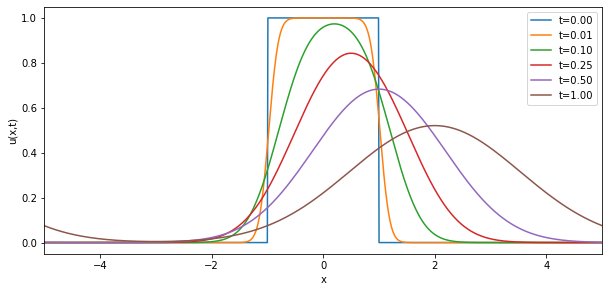

In [12]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

ds1 = yt.load("adv_diff00_0000.dat", unit_system="code")
ds2 = yt.load("adv_diff00_0001.dat", unit_system="code")
ds3 = yt.load("adv_diff00_0010.dat", unit_system="code")
ds4 = yt.load("adv_diff00_0025.dat", unit_system="code")
ds5 = yt.load("adv_diff00_0050.dat", unit_system="code")
ds6 = yt.load("adv_diff00_0100.dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
_, c3 = ds3.find_max("u")
_, c4 = ds4.find_max("u")
_, c5 = ds5.find_max("u")
_, c6 = ds6.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))
ray3 = ds3.ortho_ray(ax, (c3[1], c3[2]))
ray4 = ds4.ortho_ray(ax, (c4[1], c4[2]))
ray5 = ds5.ortho_ray(ax, (c5[1], c5[2]))
ray6 = ds6.ortho_ray(ax, (c6[1], c6[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])
srt3 = np.argsort(ray3["index", "x"])
srt4 = np.argsort(ray4["index", "x"])
srt5 = np.argsort(ray5["index", "x"])
srt6 = np.argsort(ray6["index", "x"])

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), label='t=0.00')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), label='t=0.01')
plt.plot(np.array(ray3["index", "x"][srt3]), np.array(ray3["u"][srt3]), label='t=0.10')
plt.plot(np.array(ray4["index", "x"][srt4]), np.array(ray4["u"][srt4]), label='t=0.25')
plt.plot(np.array(ray5["index", "x"][srt5]), np.array(ray5["u"][srt5]), label='t=0.50')
plt.plot(np.array(ray6["index", "x"][srt6]), np.array(ray6["u"][srt6]), label='t=1.00')
plt.xlim(-5, 5)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend(loc='upper right')

plt.savefig("advection_diffusion.png")

yt : [INFO     ] 2022-06-01 10:02:33,450 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-01 10:02:33,451 Parameters: domain_dimensions         = [120   1   1]
yt : [INFO     ] 2022-06-01 10:02:33,452 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-06-01 10:02:33,456 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-06-01 10:02:33,458 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-01 10:02:33,574 Parameters: current_time              = 0.2
yt : [INFO     ] 2022-06-01 10:02:33,575 Parameters: domain_dimensions         = [120   1   1]
yt : [INFO     ] 2022-06-01 10:02:33,577 Parameters: domain_left_edge          = [-4.  0.  0.]
yt : [INFO     ] 2022-06-01 10:02:33,578 Parameters: domain_right_edge         = [4. 1. 1.]
yt : [INFO     ] 2022-06-01 10:02:33,580 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-06-01 10:02:33,689 Parameters: current_time              = 0.3999999999999985


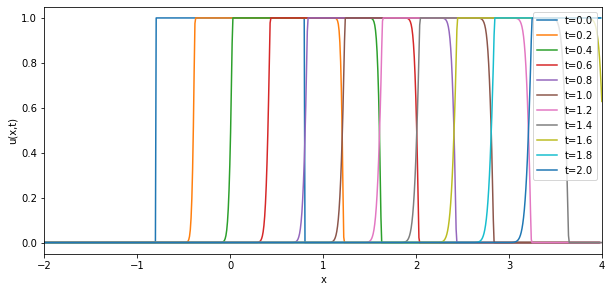

In [3]:
import matplotlib

matplotlib.use("Agg")
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import yt

n = "0100"
ds1 = yt.load("pure_adv_0000.dat", unit_system="code")
ds2 = yt.load("pure_adv_0010.dat", unit_system="code")
ds3 = yt.load("pure_adv_0020.dat", unit_system="code")
ds4 = yt.load("pure_adv_0030.dat", unit_system="code")
ds5 = yt.load("pure_adv_0040.dat", unit_system="code")
ds6 = yt.load("pure_adv_0050.dat", unit_system="code")
ds7 = yt.load("pure_adv_0060.dat", unit_system="code")
ds8 = yt.load("pure_adv_0070.dat", unit_system="code")
ds9 = yt.load("pure_adv_0080.dat", unit_system="code")
ds10 = yt.load("pure_adv_0090.dat", unit_system="code")
ds11 = yt.load("pure_adv_0100.dat", unit_system="code")
_, c1 = ds1.find_max("u")
_, c2 = ds2.find_max("u")
_, c3 = ds3.find_max("u")
_, c4 = ds4.find_max("u")
_, c5 = ds5.find_max("u")
_, c6 = ds6.find_max("u")
_, c7 = ds7.find_max("u")
_, c8 = ds8.find_max("u")
_, c9 = ds9.find_max("u")
_, c10 = ds10.find_max("u")
_, c11 = ds11.find_max("u")
ax = 0  # take a line cut along the x axis

# cutting through the y0,z0 such that we hit the max density
ray1 = ds1.ortho_ray(ax, (c1[1], c1[2]))
ray2 = ds2.ortho_ray(ax, (c2[1], c2[2]))
ray3 = ds3.ortho_ray(ax, (c3[1], c3[2]))
ray4 = ds4.ortho_ray(ax, (c4[1], c4[2]))
ray5 = ds5.ortho_ray(ax, (c5[1], c5[2]))
ray6 = ds6.ortho_ray(ax, (c6[1], c6[2]))
ray7 = ds7.ortho_ray(ax, (c7[1], c7[2]))
ray8 = ds8.ortho_ray(ax, (c8[1], c8[2]))
ray9 = ds9.ortho_ray(ax, (c9[1], c9[2]))
ray10 = ds10.ortho_ray(ax, (c10[1], c10[2]))
ray11 = ds11.ortho_ray(ax, (c11[1], c11[2]))

# Sort the ray values by 'x' so there are no discontinuities
# in the line plot
srt1 = np.argsort(ray1["index", "x"])
srt2 = np.argsort(ray2["index", "x"])
srt3 = np.argsort(ray3["index", "x"])
srt4 = np.argsort(ray4["index", "x"])
srt5 = np.argsort(ray5["index", "x"])
srt6 = np.argsort(ray6["index", "x"])
srt7 = np.argsort(ray7["index", "x"])
srt8 = np.argsort(ray8["index", "x"])
srt9 = np.argsort(ray9["index", "x"])
srt10 = np.argsort(ray10["index", "x"])
srt11 = np.argsort(ray11["index", "x"])

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.array(ray1["index", "x"][srt1]), np.array(ray1["u"][srt1]), label='t=0.0')
plt.plot(np.array(ray2["index", "x"][srt2]), np.array(ray2["u"][srt2]), label='t=0.2')
plt.plot(np.array(ray3["index", "x"][srt3]), np.array(ray3["u"][srt3]), label='t=0.4')
plt.plot(np.array(ray4["index", "x"][srt4]), np.array(ray4["u"][srt4]), label='t=0.6')
plt.plot(np.array(ray5["index", "x"][srt5]), np.array(ray5["u"][srt5]), label='t=0.8')
plt.plot(np.array(ray6["index", "x"][srt6]), np.array(ray6["u"][srt6]), label='t=1.0')
plt.plot(np.array(ray7["index", "x"][srt7]), np.array(ray7["u"][srt7]), label='t=1.2')
plt.plot(np.array(ray8["index", "x"][srt8]), np.array(ray8["u"][srt8]), label='t=1.4')
plt.plot(np.array(ray9["index", "x"][srt9]), np.array(ray9["u"][srt9]), label='t=1.6')
plt.plot(np.array(ray10["index", "x"][srt10]), np.array(ray10["u"][srt10]), label='t=1.8')
plt.plot(np.array(ray11["index", "x"][srt11]), np.array(ray11["u"][srt11]), label='t=2.0')
plt.xlim(-2, 4)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend(loc='upper right')

#plt.savefig("inviscid_burgers.png")